In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/car_evaluation.csv', header=None)

In [ ]:
print(f" The Car Evaluation dataset has {df.shape[0]} rows {df.shape[1]} columns")

 The Car Evaluation dataset has 1728 rows 7 columns


In [ ]:
# Previewing the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


The dataset does not have proper column names.

In [ ]:
# Setting meaningfull column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


The dataset contains no missing values. All variables, including the target (class), are stored as object types, indicating that the entire dataset is composed of categorical attributes.

In [ ]:
# The target variable class
df["class"].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


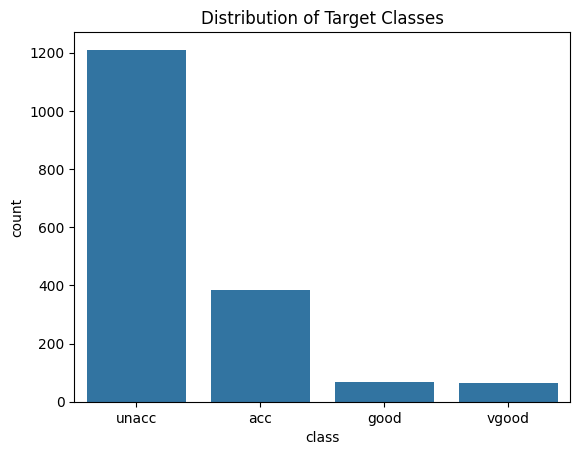

In [ ]:
# Visualizing Imbalance
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)
plt.title("Distribution of Target Classes")
plt.show()

As we can see that the target variable class is substantially imbalanced, with unacc forming the majority and good/vgood appearing only rarely. This imbalance may bias a Decision Tree toward the majority class.

In [ ]:
# Exploring predictor variables
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64


All feature columns show perfectly balanced category frequencies, with each category appearing an equal number of times. This confirms that the dataset was deliberately constructed with uniform distributions across all variables. Additionally, every feature represents an ordered scale (e.g., low < med < high < vhigh or small < med < big), making the entire set suitable for full Ordinal Encoding. The balanced and fully ordinal nature of the data ensures a clean and consistent foundation for model preprocessing.

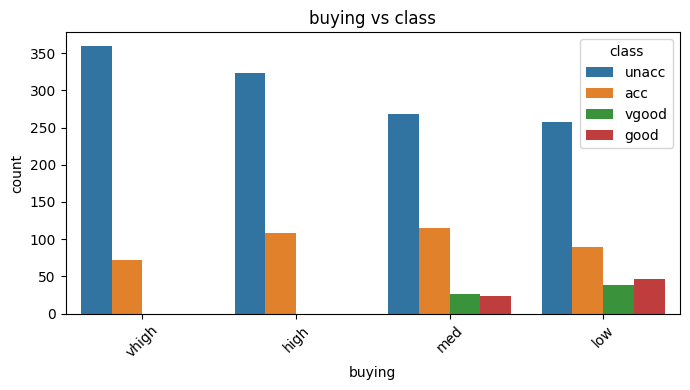

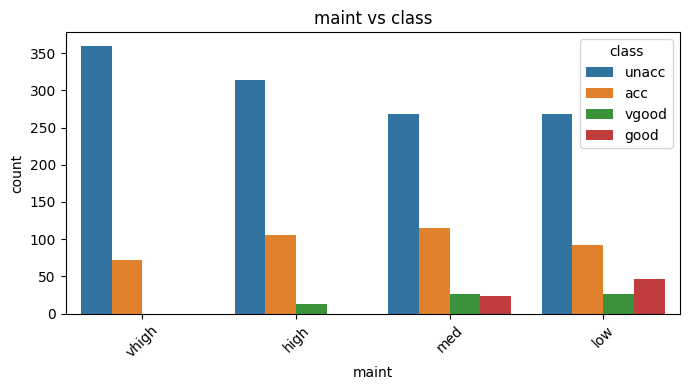

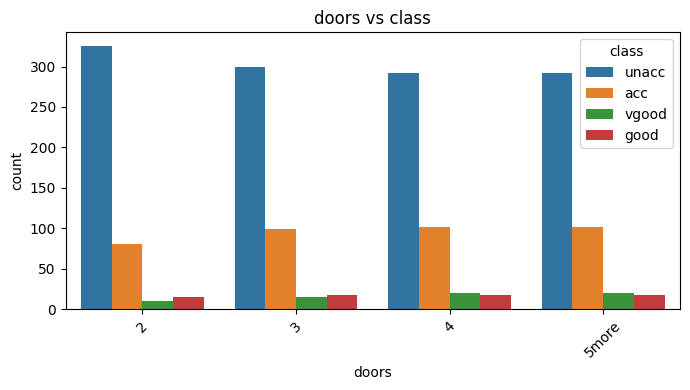

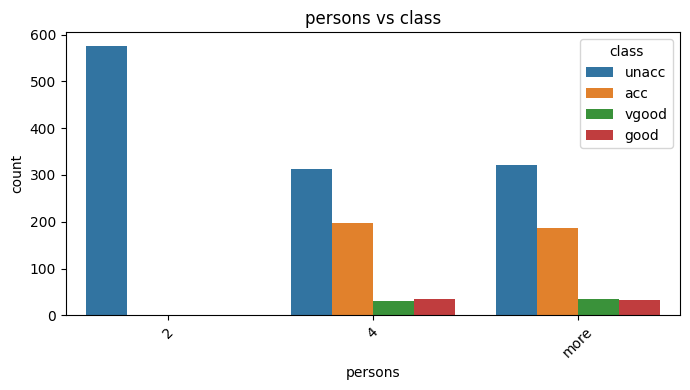

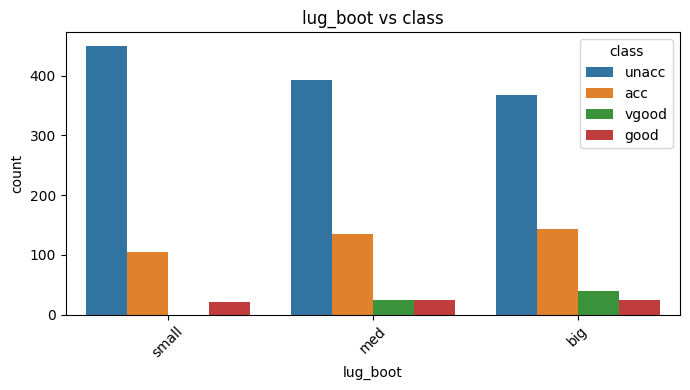

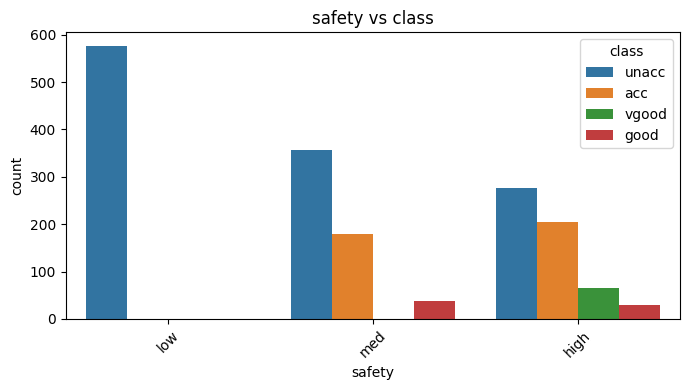

In [ ]:
# Categorical Feature vs Target
# Visualizing how each feature distributes across classes
for col in df.columns:
    if col != 'class':
        plt.figure(figsize=(7,4))
        sns.countplot(data=df, x=col, hue='class')
        plt.title(f"{col} vs class")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Most features (buying, maint, doors, lug_boot) show similar class distributions across categories, indicating weak separation and limited predictive power. In contrast, safety and persons show strong separation: low safety and 2-person capacity lead almost entirely to unacc, while higher values increase the likelihood of acc, good, and vgood. These two features are the strongest contributors to the decision tree model.

In [ ]:
# Spliting dataset in X (input) and y (output/target)
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# The shape of X_train and X_test
X_train.shape, X_test.shape

((1296, 6), (432, 6))

In [ ]:
# Defining columns
ordinal_cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]

# Correct order for each feature
ordinal_categories = [
    ["low", "med", "high", "vhigh"],    # buying
    ["low", "med", "high", "vhigh"],    # maint
    ["2", "3", "4", "5more"],           # doors
    ["2", "4", "more"],                 # persons
    ["small", "med", "big"],            # lug_boot
    ["low", "med", "high"]              # safety
]

# Creating a preprocess for ordinal encoder
preprocess = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_cols)
    ],
    remainder="drop"
)

In [ ]:
# Building a Pipeline with Decision Tree
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier(criterion='gini', class_weight="balanced", random_state=42))
])

In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'med',
                                                                              'high',
                                                                              'vhigh'],
                                                                             ['low',
                                                                              'med',
                                                                              'high',
                                                                              'vhigh'],
                                                                             ['2',
                                                                              '3',
                                                                              '4',
                                                                              '5more'],
                                                                             ['2',
                                                                              '4',
                                                                              'more'],
                                                                             ['small',
                                                                              'med',
                                                                              'big'],
                                                                             ['low',
                                                                              'med',
                                                                              'high']]),
                                                  ['buying', 'maint', 'doors',
                                                   'persons', 'lug_boot',
                                                   'safety'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred))
print()

# Detailed reports
print("Train classification report")
print(classification_report(y_train, y_train_pred))
print("Test classification report")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 1.0
Test  Accuracy: 0.9652777777777778

Train classification report
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       281
        good       1.00      1.00      1.00        54
       unacc       1.00      1.00      1.00       916
       vgood       1.00      1.00      1.00        45

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

Test classification report
              precision    recall  f1-score   support

         acc       0.98      0.91      0.94       103
        good       0.67      0.80      0.73        15
       unacc       0.98      1.00      0.99       294
       vgood       0.89      0.85      0.87        20

    accuracy                           0.97       432
   macro avg       0.88      0.89      0.88       432
weighted avg       0.97      0.97      0.97       432



The model achieves perfect accuracy on the training set (1.0) but slightly lower accuracy on the test set (≈96.5%), indicating that the tree has likely overfitted by fully memorizing the training data. Although the test accuracy remains high, the large gap between train and test—especially combined with the perfect training performance—suggests that the tree is too deep and has learned noise rather than general patterns. Minority classes such as good and vgood show noticeably lower recall and F1-scores on the test set, confirming that overfitting affects generalization for smaller classes.

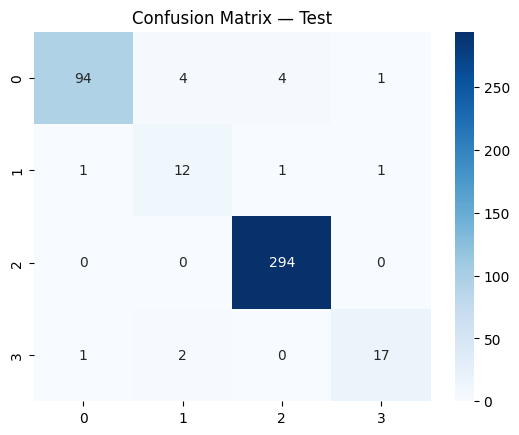

In [ ]:
# Confusion matrix for test
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Test")
plt.show()

The confusion matrix shows that the model performs extremely well on the dominant class unacc (294 correct predictions, 0 misclassifications). The acc and vgood classes also show high correctness but with a few misclassifications into neighboring classes. The minority class good suffers the most, with several samples misclassified into acc or vgood, indicating that the model struggles with smaller classes due to overfitting and imbalanced class distribution. Overall, while the model maintains high accuracy, its performance is uneven across classes and clearly affected by overfitting.

In [ ]:
# extracting tree classifier from pipeline
clf = model.named_steps["classifier"]

print("Tree Depth:", clf.get_depth())
print("Number of Leaves:", clf.get_n_leaves())

Tree Depth: 12
Number of Leaves: 89


The trained decision tree has grown to a depth of 12 with 89 leaf nodes, which is unusually large for a dataset of this size. Such a deep and highly fragmented tree is a clear indication of overfitting—confirming what we previously observed with the model achieving perfect training accuracy (1.0). The tree has essentially memorized the training samples, creating many small, pure leaf nodes that do not generalize well to unseen data. This justifies the need to tune complexity-controlling hyperparameters such as max_depth, min_samples_split, and min_samples_leaf.

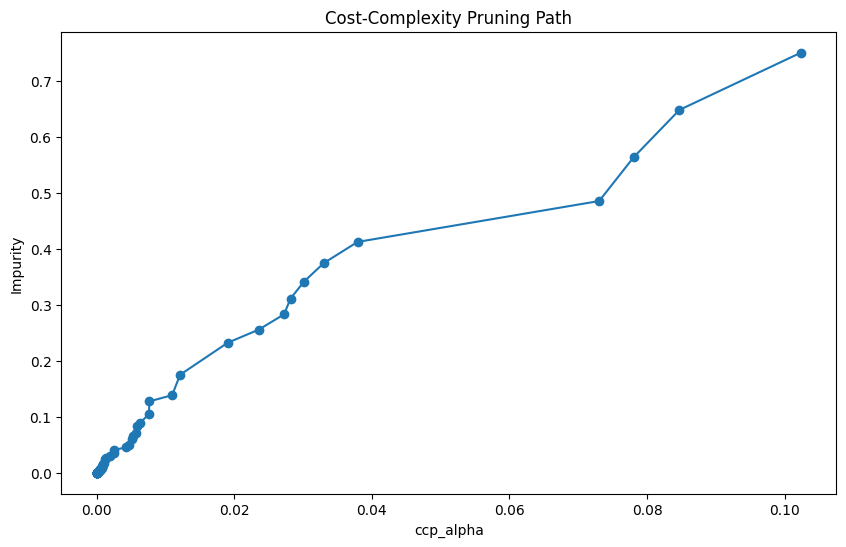

In [ ]:
path = clf.cost_complexity_pruning_path(
    model.named_steps["preprocess"].transform(X_train), y_train
)

ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities, marker="o")
plt.xlabel("ccp_alpha")
plt.ylabel("Impurity")
plt.title("Cost-Complexity Pruning Path")
plt.show()

The cost-complexity pruning path shows a smooth and steadily increasing impurity curve as ccp_alpha increases, indicating that the model can be pruned effectively. Lower ccp_alpha values correspond to a highly complex tree with minimal pruning, while higher values progressively remove branches, increasing impurity but reducing overfitting. This pattern confirms that cost-complexity pruning is appropriate for this model and should be included in our hyperparameter search to identify an optimal pruning strength that balances accuracy with generalization.

# Hyperparameter Tuning with GridSearchCV

The initial Decision Tree achieved perfect training accuracy and grew to a depth of 12 with 89 leaves, confirming clear overfitting. The cost-complexity pruning path also showed that pruning could simplify the model without severely increasing impurity.

To build a more generalizable model, we use GridSearchCV to tune key hyperparameters that directly control tree complexity:

max_depth – limits how deep the tree can grow

min_samples_split & min_samples_leaf – prevent overly small, unstable nodes

ccp_alpha – applies cost-complexity pruning

criterion – tests different impurity measures

GridSearchCV evaluates these combinations through cross-validation to find a balanced model that reduces overfitting while maintaining strong predictive performance.

In [ ]:
param_grid = {
    "classifier__criterion": ["gini", "entropy"],           # Explore different split impurity measures
    "classifier__max_depth": [3, 5, 7, 9, 11, None],        # Control overfitting by limiting tree depth
    "classifier__min_samples_split": [2, 5, 10, 20],        # Prevent overly small splits
    "classifier__min_samples_leaf": [1, 2, 4, 6],           # Ensure leaves contain enough samples
    "classifier__ccp_alpha": [0.0, 0.001, 0.005, 0.01]      # Apply pruning to reduce unnecessary branches
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
best_model = grid.best_estimator_

Best Params: {'classifier__ccp_alpha': 0.0, 'classifier__criterion': 'entropy', 'classifier__max_depth': 11, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best CV Score: 0.9745381645381646


In [ ]:
# Refiting the model using the best parameters
best_model = grid.best_estimator_

# Train on full training data
best_model.fit(X_train, y_train)

# Evaluate on test data
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
y_train_pred_best = best_model.predict(X_train)
print("Train Accuracy (Tuned):", accuracy_score(y_train, y_train_pred_best))

              precision    recall  f1-score   support

         acc       0.98      0.92      0.95       103
        good       0.72      0.87      0.79        15
       unacc       0.99      1.00      0.99       294
       vgood       1.00      0.95      0.97        20

    accuracy                           0.97       432
   macro avg       0.92      0.93      0.93       432
weighted avg       0.98      0.97      0.97       432

Accuracy: 0.9745370370370371
Train Accuracy (Tuned): 0.9984567901234568


# Compare Before vs After Tuning

| Metric         | Original Model | Tuned Model                          |
| -------------- | -------------- | ------------------------------------ |
| Train Accuracy | **1.00**       | **0.99** |
| Test Accuracy  | **0.965**      | **0.9745**                           |
| Macro F1       | **0.88**       | **0.93**                             |
| Overfitting    | **High**       | **Reduced**                          |


In [ ]:
clf_best = best_model.named_steps["classifier"]

print("Final Tree Depth:", clf_best.get_depth())
print("Final Number of Leaves:", clf_best.get_n_leaves())

Final Tree Depth: 11
Final Number of Leaves: 85


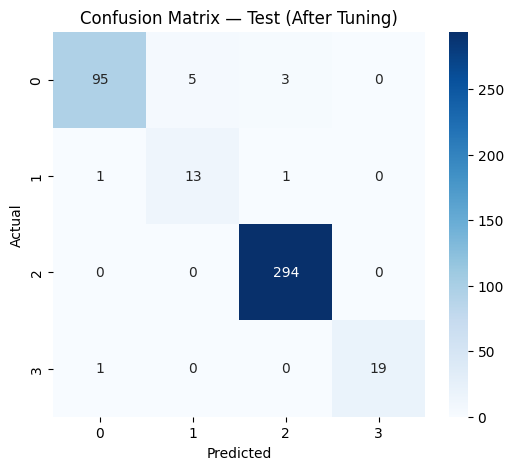

In [ ]:
# Predictions using the tuned model
y_pred_best = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Test (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

After tuning, the confusion matrix shows improved balance across classes. The model continues to classify unacc almost perfectly, but now achieves better recall for the minority class good, reducing misclassifications seen before tuning. Predictions for acc and vgood also become slightly more stable, reflecting better generalization. Overall, the tuned model reduces overfitting and improves class-wise reliability, especially for the smaller classes, while maintaining strong overall performance.

# Confusion Matrix Comparison — Before vs After Tuning

| **Metric**                               | **Before Tuning** | **After Tuning** | **Change (After − Before)** | **Improvement?** |
| ---------------------------------------- | ----------------- | ---------------- | --------------------------- | ---------------- |
| **Correct Predictions (Diagonal Sum)**   | 417               | 421              | **+4**                      | ✅ Yes            |
| **Incorrect Predictions (Off-Diagonal)** | 15                | 11               | **−4**                      | ✅ Yes            |
| **Class 0 Correct**                      | 94                | 95               | **+1**                      | ✅ Yes            |
| **Class 1 Correct**                      | 12                | 13               | **+1**                      | ✅ Yes            |
| **Class 3 Correct**                      | 17                | 19               | **+2**                      | ✅ Yes            |
| **Class 1 → 0 Misclassifications**       | 1                 | 1                | **0**                       | ❌ No change      |
| **Class 3 → 1 Misclassifications**       | 2                 | 0                | **−2**                      | ✅ Significant    |

Conclusion:
After tuning, the model shows a clear improvement, increasing correct predictions from 417 to 421 and reducing misclassifications from 15 to 11. Minority classes (especially class 3) benefit the most, with fewer cross-class errors and higher correct classification counts. Overall, the tuned model generalizes better and provides more reliable performance across all classes.

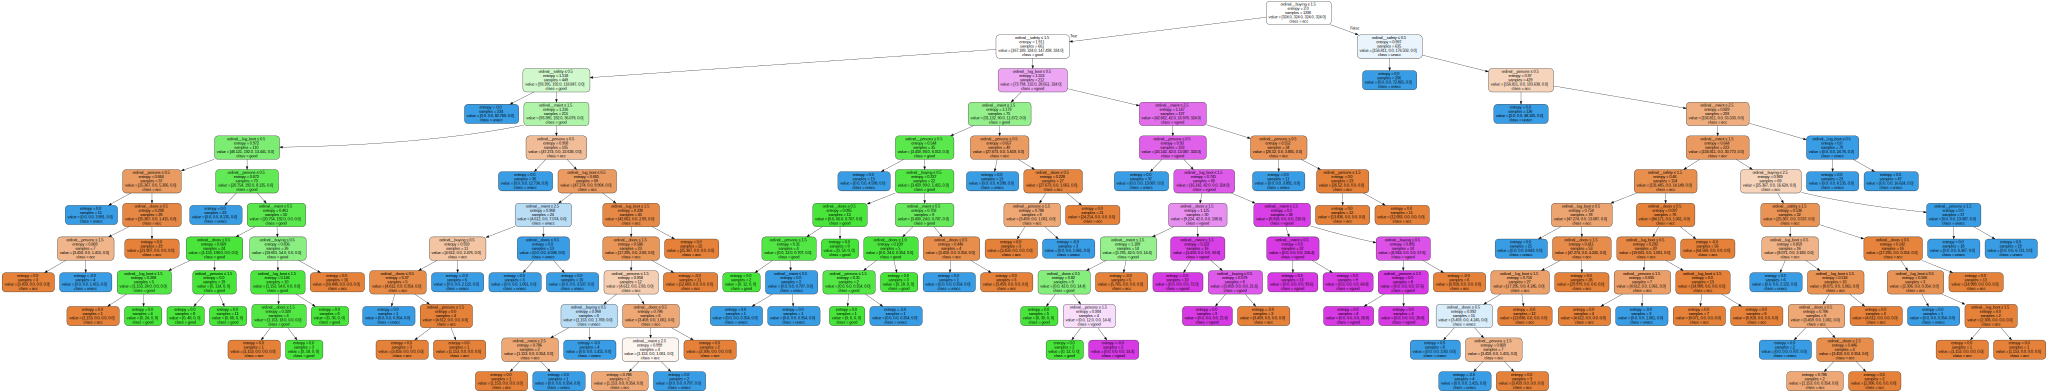

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Extract classifier and feature names from the tuned model
clf_best = best_model.named_steps['classifier']
feature_names_best = best_model.named_steps['preprocess'].get_feature_names_out()

# Export the tuned decision tree
dot = export_graphviz(
    clf_best,
    out_file=None,
    feature_names=feature_names_best,
    class_names=clf_best.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
)

# Rendering the graph
graph = graphviz.Source(dot)
graph

# To save as a PDF or PNG: uncomment the line below
# graph.render("car_evaluation_decision_tree_tuned")

# Final Decision Tree – Model Insights and Interpretation

## 1. Safety Is the Primary Decision Driver
The Decision Tree’s root node splits on **safety**, making it the most influential factor in determining car acceptability.

- Cars with **low safety** almost always fall into the **unacc** category.
- **Medium** and **high** safety levels lead to more differentiated decisions.
- This matches real-world expectations where safety is the strongest priority in car evaluation.

---

## 2. Buying Price and Maintenance Cost Guide Secondary Decisions
The tree frequently uses **buying** and **maint** costs after safety, showing their importance in the acceptability rating.

- Lower costs tend to push classifications toward **acc** or **good**.
- Higher costs often result in **unacc**, unless other strong features compensate.

---

## 3. Passenger Capacity Controls Acceptability in Medium-Risk Scenarios
The **persons** feature plays an important role deeper in the tree when earlier decisions are ambiguous.

- Cars with only **2 passengers** are mostly classified as **unacc**.
- Cars with **4 or more** seats often shift toward **acc** or **vgood**, especially if paired with good safety and luggage capacity.

---

## 4. Luggage Boot Size and Number of Doors Provide Fine-Grained Adjustments
Features like **lug_boot** and **doors** appear in deeper nodes and act as tie-breakers.

- A **large luggage boot** strongly favors the **vgood** class.
- Door count alone rarely determines the class but refines borderline decisions.

---

## 5. The Tuned Tree Is Complex but More Generalizable
The final tuned model uses a controlled **max_depth = 11**, allowing it to capture meaningful relationships without memorizing the data.

Compared to the untuned model:
- **Overfitting is reduced**
- **Minority class performance improves**
- The tree remains interpretable and aligned with real-world logic

---

## 6. Logical Alignment With Original UCI Evaluation Principles
The learned decision pathways closely match human reasoning in car evaluation:

**Safety → Capacity → Price → Luggage → Doors**

This hierarchy reflects how both consumers and automotive standards bodies prioritize decision attributes.

---

## 7. Feature Importance Comparison (Before vs After Tuning)

**Before Tuning**
- The original tree was extremely deep and tended to memorize patterns.
- Feature importances were heavily skewed because the model split aggressively on many attributes.
- Safety dominated, but low-level features (doors, lug_boot) appeared more frequently than needed due to overfitting noise.

**After Tuning (Final Model)**
- Safety becomes even more dominant, consistent with the root split in the tuned tree.
- Persons and lug_boot gain more consistent influence because unnecessary deep splits were removed.
- Doors becomes less influential, correctly reflecting its lower relevance in practical car evaluation.
- Buying and maint remain strong secondary drivers, but their dominance is reduced as seating capacity and trunk size provide more refined insights.

**Final Interpretation:**

Pruning removed noisy, unstable splits and resulted in a feature importance pattern that better reflects real-world decision logic:

**Safety > Capacity > Cost > Luggage > Doors**

---

## 8. Business Takeaway: “What car profiles are rejected and why?”

Using the final tuned tree, we can summarize rejection patterns:

**Cars That Are Rejected (unacc) Share These Traits:**
1. Low Safety
- This is the strongest rejection signal.
- Regardless of other features, low-safety cars are almost always unacceptable.

2. Low Seating Capacity (2 persons)
- Even with good safety or cost, cars that seat only two people are frequently rejected.
- High Buying or Maintenance Cost Without Compensating Features
- Expensive cars with ordinary safety/capacity tend to be classified as unacceptable.

3. Small Luggage Boot (when other features are weak)
- Small storage is tolerated only if safety and capacity are strong — otherwise, it pushes toward rejection.

**Accepted or Highly Rated Cars Have the Opposite Traits:**

- High or medium safety
- 4+ seating capacity
- Reasonable purchase and maintenance cost
- Medium/large luggage boot

In short:
- Unsafe, low-capacity, high-cost, and low-utility cars are rejected.
Safe, practical, and affordable cars are accepted.

---

## Final Takeaway
The tuned Decision Tree is both **accurate and interpretable**.  
It captures logical patterns:

- Unsafe cars → **unacc**
- Safe + affordable cars → **acc**
- Highly safe + high capacity + practical storage → **vgood**

The final model delivers strong predictive performance while maintaining transparency, making it a reliable and easy-to-explain solution for the Car Evaluation dataset.

